# Cylinder Experiments

## Setup

In [2]:
import math
import random

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
EPSILON = 10 ** -9

## Prism Stuff

In [4]:
class RectangularPrism:
    def __init__(self, width, height, depth, translation=(0, 0, 0), rotation=(0, 0, 0)):
        self.width = width
        self.height = height
        self.depth = depth
        
        self.translation_vector = np.array(translation)  # (x, y, z)
        
        # Convert degrees to radians
        rx, ry, rz = np.radians(rotation)

        # Rotation matrices for each axis
        Rx = np.array([
            [1, 0, 0],
            [0, np.cos(rx), -np.sin(rx)],
            [0, np.sin(rx), np.cos(rx)]
        ])
        
        Ry = np.array([
            [np.cos(ry), 0, np.sin(ry)],
            [0, 1, 0],
            [-np.sin(ry), 0, np.cos(ry)]
        ])
        
        Rz = np.array([
            [np.cos(rz), -np.sin(rz), 0],
            [np.sin(rz), np.cos(rz), 0],
            [0, 0, 1]
        ])
        
        # Combine the rotations (rotation order: Z, Y, X)
        self.rotation_matrix = Rz @ Ry @ Rx

    def get_corners(self):
        # Define the 8 corners of a unit cube centered at the origin
        # Corners before centering
        corners = np.array([
            [-self.width/2, -self.height/2, -self.depth/2],
            [-self.width/2, -self.height/2,  self.depth/2],
            [-self.width/2,  self.height/2, -self.depth/2],
            [-self.width/2,  self.height/2,  self.depth/2],
            [ self.width/2, -self.height/2, -self.depth/2],
            [ self.width/2, -self.height/2,  self.depth/2],
            [ self.width/2,  self.height/2, -self.depth/2],
            [ self.width/2,  self.height/2,  self.depth/2]
        ])
        
        return corners @ self.rotation_matrix.T + self.translation_vector

    def volume(self):
        return self.width * self.height * self.depth

    def sample_surface_point(self):
        xy_area = self.width * self.height
        xz_area = self.width * self.depth
        yz_area = self.height * self.depth
        total_area = 2 * xy_area + 2 * xz_area + 2 * yz_area
    
        # Randomly select a face based on the areas
        prob = random.uniform(0, total_area)
    
        # Check which face to sample from
        if prob < 2 * xy_area:
            # Select from a face with fixed z (front/back)
            z = self.depth / 2 if random.random() < 0.5 else -self.depth / 2
            point = np.array([random.uniform(-self.width / 2, self.width / 2), random.uniform(-self.height / 2, self.height / 2), z])
        elif prob < 2 * xy_area + 2 * xz_area:
            y = self.height / 2 if random.random() < 0.5 else -self.height / 2
            point = np.array([random.uniform(-self.width / 2, self.width / 2), y, random.uniform(-self.depth / 2, self.depth / 2)])
        else:
            # Select from a face with fixed x (left/right)
            x = self.width / 2 if random.random() < 0.5 else -self.width / 2
            point = np.array([x, random.uniform(-self.height / 2, self.height / 2), random.uniform(-self.depth / 2, self.depth / 2)])
    
        # Apply rotation and translation to the sampled point
        return point @ self.rotation_matrix.T + self.translation_vector

In [5]:
def sample_surface_point(prism):
    xy_area = prism.width * prism.height
    xz_area = prism.width * prism.depth
    yz_area = prism.height * prism.depth
    total_area = xy_area + xz_area + yz_area

    # Randomly select a face based on the areas
    prob = random.uniform(0, total_area)

    # Check which face to sample from
    if prob < xy_area:
        # Select from a face with fixed z (front/back)
        z = prism.depth / 2 if random.random() < 0.5 else -prism.depth / 2
        point = np.array([random.uniform(-prism.width / 2, prism.width / 2), random.uniform(-prism.height / 2, prism.height / 2), z])
    elif prob < xy_area + xz_area:
        y = prism.height / 2 if random.random() < 0.5 else -prism.height / 2
        point = np.array([random.uniform(-prism.width / 2, prism.width / 2), y, random.uniform(-prism.depth / 2, prism.depth / 2)])
    else:
        # Select from a face with fixed x (left/right)
        x = prism.width / 2 if random.random() < 0.5 else -prism.width / 2
        point = np.array([x, random.uniform(-prism.height / 2, prism.height / 2), random.uniform(-prism.depth / 2, prism.depth / 2)])

    # Apply rotation and translation to the sampled point
    return point @ prism.rotation_matrix.T + prism.translation_vector

## Visualization Functions

In [6]:
def visualize_prism(prism):
    """ Visualizes a rectangular prism given an instance of RectangularPrism. """
    # Get the 8 corners of the rectangular prism
    corners = prism.get_corners()

    # Define the six faces of the rectangular prism, connecting the corners
    faces = [
        [corners[0], corners[1], corners[5], corners[4]],  # front face
        [corners[2], corners[3], corners[7], corners[6]],  # back face
        [corners[0], corners[1], corners[3], corners[2]],  # left face
        [corners[4], corners[5], corners[7], corners[6]],  # right face
        [corners[2], corners[0], corners[4], corners[6]],  # top face
        [corners[3], corners[1], corners[5], corners[7]]   # bottom face
    ]

    # Create a plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Add the faces to the plot
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

    # Set plot labels and axis limits
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([prism.translation_vector[0] - prism.width, prism.translation_vector[0] + prism.width])
    ax.set_ylim([prism.translation_vector[1] - prism.height, prism.translation_vector[1] + prism.height])
    ax.set_zlim([prism.translation_vector[2] - prism.depth, prism.translation_vector[2] + prism.depth])

    plt.show()

In [7]:
def visualize_points(points, color='b', marker='o'):
    """
    Visualizes a list of points in 3D space.

    Args:
    - points: List or array of points where each point is a 3D coordinate (x, y, z).
    - color: Color of the points (default is blue).
    - marker: Marker style for the points (default is 'o' for circular markers).
    """
    if type(points[0]) == Point:
        points = [(P.x, P.y, P.z) for P in points]
    points = np.array(points)  # Convert to numpy array if it's a list of lists or tuples

    # Create a plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color=color, marker=marker)

    # Set plot labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Display the plot
    plt.show()

In [8]:
def visualize_debug(prism, points, color='b', marker='o'):
    # Get the 8 corners of the rectangular prism
    corners = prism.get_corners()

    # Define the six faces of the rectangular prism, connecting the corners
    faces = [
        [corners[0], corners[1], corners[5], corners[4]],  # front face
        [corners[2], corners[3], corners[7], corners[6]],  # back face
        [corners[0], corners[1], corners[3], corners[2]],  # left face
        [corners[4], corners[5], corners[7], corners[6]],  # right face
        [corners[2], corners[0], corners[4], corners[6]],  # top face
        [corners[3], corners[1], corners[5], corners[7]]   # bottom face
    ]

    # Create a plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Add the faces to the plot
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

    if type(points[0]) == Point:
        points = [(P.x, P.y, P.z) for P in points]
    points = np.array(points)  # Convert to numpy array if it's a list of lists or tuples

    # Plot the points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color=color, marker=marker)

    # Set plot labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Display the plot
    plt.autoscale(False)
    plt.show()

In [9]:
def plot_xy_projection(points, title='XY Projection'):
    # Extract X and Y coordinates
    xs = [p.x for p in points]
    ys = [p.y for p in points]

    plt.figure(figsize=(6, 6))
    plt.scatter(xs, ys, c='blue', edgecolors='k')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.axis('equal')
    plt.grid(True)
    plt.show()

## Helper Functions

In [10]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def __repr__(self):
        return f'Point({self.x}, {self.y}, {self.z})'

In [11]:
class Points:
    def center(points):
        mu_X = sum(p.x for p in points) / len(points)
        mu_Y = sum(p.y for p in points) / len(points)
        mu_Z = sum(p.z for p in points) / len(points)

        for p in points:
            p.x -= mu_X
            p.y -= mu_Y
            p.z -= mu_Z

    def project(points, plane):
        for p in points:
            dist = plane.signed_distance_to_point(p)

            p.x -= dist * plane.a
            p.y -= dist * plane.b
            p.z -= dist * plane.c

    def rotate(points, rotation_matrix):
        
        rotated = np.array([np.array((p.x, p.y, p.z)) for p in points]) @ rotation_matrix.T
        for i, p in enumerate(points):
            p.x, p.y, p.z = rotated[i]

In [12]:
class Plane: # ax + by + cz + d = 0, ||(a, b, c)|| = 1
    def __init__(self, a, b, c, d):
        norm = math.sqrt(a**2 + b**2 + c**2)
        self.a = a / norm
        self.b = b / norm
        self.c = c / norm
        self.d = d / norm
    
    @staticmethod
    def from_points(P, Q, R):
        a = (Q.y - P.y) * (R.z - P.z) - (R.y - P.y) * (Q.z - P.z)
        b = (R.x - P.x) * (Q.z - P.z) - (Q.x - P.x) * (R.z - P.z)
        c = (Q.x - P.x) * (R.y - P.y) - (Q.y - P.y) * (R.x - P.x)
        d = (-a * P.x - b * P.y - c * P.z)
        return Plane(a, b, c, d)
    
    def signed_distance_to_point(self, P):
        numerator = self.a * P.x + self.b * P.y + self.c * P.z + self.d
        denominator = math.sqrt(self.a * self.a + self.b * self.b + self.c * self.c)
        return numerator / denominator
    
    def __repr__(self):
        return f'Plane({self.a}, {self.b}, {self.c}, {self.d})'

In [13]:
def equals_epsilon(a, b):
    return abs(a - b) < EPSILON

In [14]:
def center(points):
    mu_X = sum(p.x for p in points) / len(points)
    mu_Y = sum(p.y for p in points) / len(points)
    mu_Z = sum(p.z for p in points) / len(points)
    return [Point(p.x - mu_X, p.y - mu_Y, p.z - mu_Z) for p in points]

## Test Area

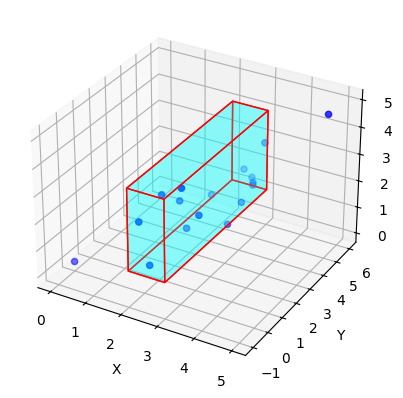

In [15]:
r = RectangularPrism(1, 7, 3, (2.5, 2.5, 2.5), (0, 0, 0))
samples = [r.sample_surface_point() for _ in range(15)]
samples.append((0, 0, 0))
samples.append((5, 5, 5))
samples = np.array(samples)
visualize_debug(r, samples)

## Test Area 2

In [16]:
random.seed(70)
r = RectangularPrism(1, 5, 7, (2.5, 2.5, 2.5), (10, 30, 50))
N = 50
points = [Point(*sample_surface_point(r)) for _ in range(N)]

In [17]:
random.seed(30)

In [18]:
# debug
mu_X = sum(p.x for p in points) / len(points)
mu_Y = sum(p.y for p in points) / len(points)
mu_Z = sum(p.z for p in points) / len(points)
old_vec = r.translation_vector
r.translation_vector = (old_vec[0] -mu_X, old_vec[1] -mu_Y, old_vec[2] -mu_Z)

In [19]:
Points.center(points)

[Point(-2.627935447442418, -0.20458106041199153, -1.9522310177731463), Point(2.3938410170149225, -1.371559777258929, 1.156478451499496), Point(-0.04088842335749865, -0.19967870069773674, -1.0654614307166452)]


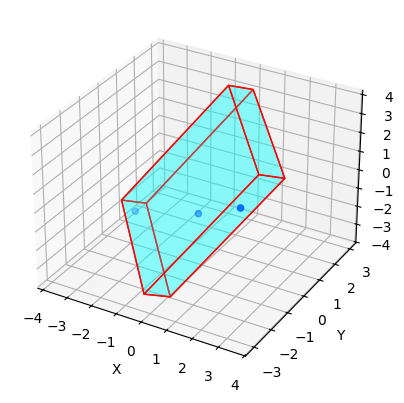

[Point(-0.1097674829181785, 1.075633048904212, 0.5499719080147187), Point(-0.04088842335749865, -0.19967870069773674, -1.0654614307166452), Point(-2.160757618918214, 0.938494841199522, -1.9154378872548181)]


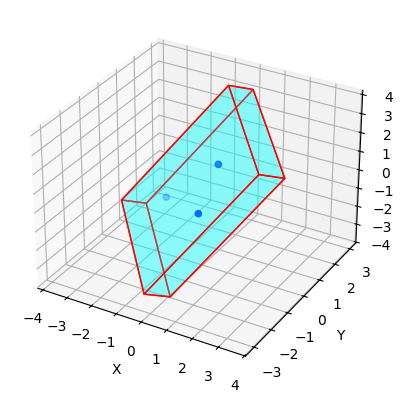

In [20]:
while True:
    sample = random.sample(points, 3)
    
    print(sample)
    visualize_debug(r, sample)
    
    first_plane = Plane.from_points(*sample)
    signed_distances = [first_plane.signed_distance_to_point(P) for P in points]
    max_signed_distance, min_signed_distance = max(signed_distances), min(signed_distances)
    if not equals_epsilon(max_signed_distance, 0) and not equals_epsilon(min_signed_distance, 0):
        continue # plane isn't tangent to the prism

    break

In [21]:
max_abs_distance = max(abs(max_signed_distance), abs(min_signed_distance))

In [22]:
points_on_first_plane, points_on_second_plane, points_on_other_planes = [], [], []
for p, d in zip(points, signed_distances):
    if equals_epsilon(d, 0):
        points_on_first_plane.append(p)
    elif equals_epsilon(abs(d), max_abs_distance):
        points_on_second_plane.append(p)
    else:
        points_on_other_planes.append(p)

[Point(-0.8132447620153829, -0.5329167374336903, -2.3675067767502544), Point(-0.1097674829181785, 1.075633048904212, 0.5499719080147187), Point(0.29318780879391726, -0.32049704343550234, -0.8538258792028497), Point(1.340441384784433, -1.639294038178619, -1.4376923889587014), Point(1.2082406468815057, 0.6130972290000241, 1.4036587027088432), Point(-1.0437724700033504, 2.1305614435708335, 0.9098144726169863), Point(0.5291424331958177, 2.374696841991783, 2.984930463951597), Point(0.8679711016067442, -1.5343684856734487, -1.8244946811744642), Point(0.6159607651264349, -1.7349010022444835, -2.371140207519107), Point(-1.8027486257069374, 1.0736825682113094, -1.3374810214579302), Point(-0.2972826773147017, 0.40134002772438215, -0.5534671990440914), Point(-2.0935598975186367, 0.21511712730108057, -2.800421652847174), Point(-0.6369738955374153, 0.3972318963632868, -0.9371100744593066), Point(-0.6400077154465418, 1.3448723527832311, 0.31686804333704455), Point(0.05114572075965551, -0.86050321653

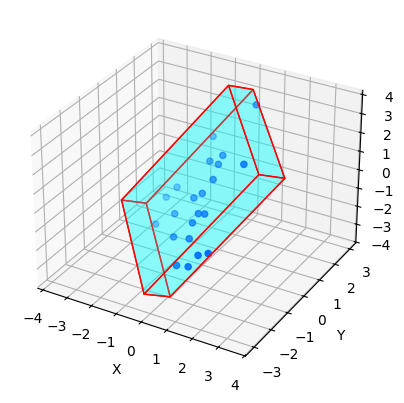

[Point(-0.3898474672585368, 1.0094868792242595, 2.150382851451306), Point(-1.4991612649251678, 0.22499279160207797, -0.12555009774685377), Point(-2.5358607106351543, 1.023914495330132, -0.21971828289305861), Point(1.3406633099512186, -1.882752889476838, 0.23952669387083247), Point(-0.08879590126499837, -0.18035664573181664, 0.9068382611213148), Point(1.3053182904048044, 0.4275943422834483, 3.265608798914235), Point(0.8645013353787072, 0.3657185998150303, 2.6927308370202154), Point(0.40444911333603484, -0.24700851328887818, 1.367552502292385), Point(-2.627935447442418, -0.20458106041199153, -1.9522310177731463), Point(1.544510892917153, -1.200145442459743, 1.3721811276030684), Point(-1.8003061609059223, -0.5152217566117736, -1.4429643085333408), Point(0.7960066486439907, 0.7324944941271525, 3.1031213960788064), Point(-3.28272352266422, 0.2570608594984325, -2.068713918801858)]


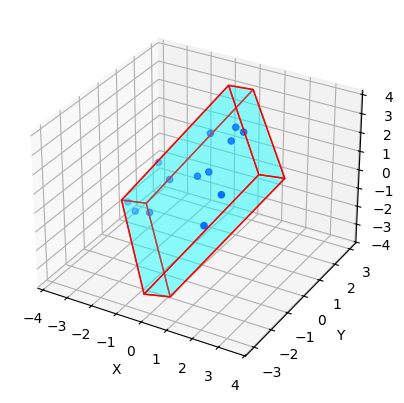

[Point(0.3786760387847776, 1.7163584987776979, 3.3922421140762586), Point(2.8983949529827266, -0.9339806830541195, 1.4648810457426884), Point(2.44977946669338, -1.4181284953756592, 1.6329582238645322), Point(1.9546990140876344, -1.5286167556210348, -0.1529498741349946), Point(0.530454251958902, -2.302844030750663, -3.1677401419909614), Point(2.3938410170149225, -1.371559777258929, 1.156478451499496), Point(-1.5619531734236993, 1.9909973234879796, 0.38693406164035293), Point(2.316665558383811, -0.04597884556946008, 2.9195530155044644), Point(0.2867480105819986, 2.2875304357834363, 3.262832229376922), Point(-1.9754179244441032, 1.6319064049584764, 0.13657991037100503), Point(2.173291635810249, -1.5781491313322578, 1.0929143317841716), Point(1.8830971680526116, 1.0720635148093391, 2.7999201371729927), Point(0.08653743175931172, -2.4715123685511258, -3.357263529724569), Point(1.264739450339277, -2.114595494112685, -0.6323372412224608), Point(-2.809505066760011, 1.24188982691913, -1.9238904

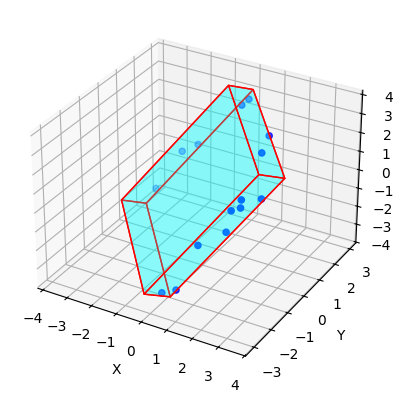

In [23]:
print(points_on_first_plane)
visualize_debug(r, points_on_first_plane)

print(points_on_second_plane)
visualize_debug(r, points_on_second_plane)

print(points_on_other_planes)
visualize_debug(r, points_on_other_planes)

In [24]:
Points.project(points_on_other_planes, first_plane)

[Point(0.7817982896234705, 2.1967808894693746, 3.0301586878702897), Point(2.963027372839602, -0.8569547644916307, 1.4068283632696377), Point(2.879008710398295, -0.9065930021438309, 1.2474255601003046), Point(2.0810672944145217, -1.3780169035515144, -0.2664535564778099), Point(0.5449723854556052, -2.2855419929982044, -3.1807802942218673), Point(2.690585520109865, -1.0179134496129474, 0.8899432598427137), Point(-1.4953729234607835, 2.070344575577105, 0.3271318428988504), Point(2.638510160473902, 0.3375806152284594, 2.630472975917894), Point(0.4714023134919545, 2.507592864664356, 3.0969761831720564), Point(-1.7177814704936134, 1.9389455745372055, -0.09482852656808491), Point(2.5969823247012807, -1.073214230697655, 0.7123563844963188), Point(1.8931024458566685, 1.083987340577227, 2.790933420959987), Point(0.24815604533348878, -2.278902805194005, -3.502428975739636), Point(1.687887007508252, -1.6103078726590954, -1.0124073489172516), Point(-2.722867254045705, 1.3451407514759086, -2.00170833

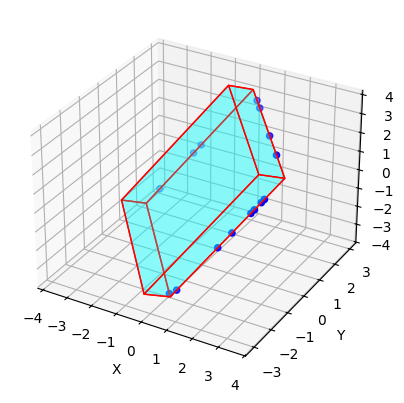

In [25]:
print(points_on_other_planes)
visualize_debug(r, points_on_other_planes)

In [26]:
Points.center(points_on_other_planes)

[Point(-0.2542335918569829, 2.191919050123991, 2.6252507120673476), Point(1.9269954913591487, -0.8618166038370142, 1.0019203874666958), Point(1.8429768289178416, -0.9114548414892144, 0.8425175842973627), Point(1.0450354129340682, -1.3828787428968978, -0.6713615322807518), Point(-0.4910594960248482, -2.290403832343588, -3.585688270024809), Point(1.6545536386294115, -1.0227752889583308, 0.4850352840397718), Point(-2.531404804941237, 2.0654827362317216, -0.07777613290409152), Point(1.6024782789934484, 0.33271877588307586, 2.225565000114952), Point(-0.564629567988499, 2.5027310253189725, 2.6920682073691147), Point(-2.753813351974067, 1.934083735191822, -0.49973650237102685), Point(1.5609504432208272, -1.0780760700430385, 0.30744840869337686), Point(0.8570705643762151, 1.0791255012318435, 2.3860254451570455), Point(-0.7878758361469647, -2.283764644539388, -3.907336951542578), Point(0.6518551260277985, -1.6151697120044788, -1.4173153247201935), Point(-3.7588991355261583, 1.3402789121305252, 

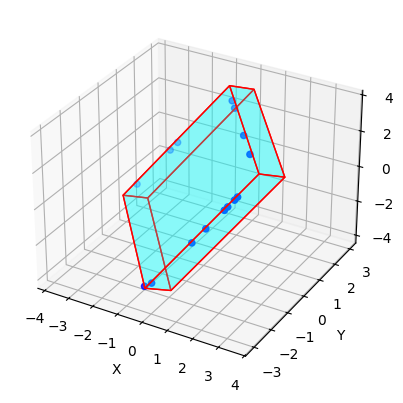

In [27]:
print(points_on_other_planes)
visualize_debug(r, points_on_other_planes)

In [28]:
first_plane

Plane(0.5566703992264194, 0.6634139481689386, -0.49999999999999983, -0.37749970520903553)

In [29]:
normal = np.asarray((first_plane.a, first_plane.b, first_plane.c), dtype=np.float64)

target = np.array([0.0, 0.0, 1.0])

In [30]:
# Axis of rotation (cross product)
axis = np.cross(normal, target)
axis_norm = np.linalg.norm(axis)
if axis_norm == 0:
    # normal and target are opposite
    # Rotate 180 degrees around any perpendicular axis, e.g. x-axis
    axis = np.array([1.0, 0.0, 0.0])
else:
    axis /= axis_norm

In [31]:
# Angle between normal and target
angle = np.arccos(np.clip(np.dot(normal, target), -1.0, 1.0))

In [32]:
# Rodrigues' rotation formula
K = np.array([
    [0, -axis[2], axis[1]],
    [axis[2], 0, -axis[0]],
    [-axis[1], axis[0], 0]
])


In [33]:
R = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * (K @ K)

In [34]:
R

array([[ 0.38023613, -0.73860581, -0.5566704 ],
       [-0.73860581,  0.11976387, -0.66341395],
       [ 0.5566704 ,  0.66341395, -0.5       ]])

In [35]:
# Apply rotation
Points.rotate(points_on_other_planes, R)

[Point(-3.1770323157689258, -1.29133682952784, -8.32110575849426e-17), Point(0.8115166471908002, -2.1911925238374805, 1.114487141388611e-16), Point(0.9049676289056588, -2.029330675490154, 3.5360993784147314e-16), Point(1.7924895973340411, -0.49209753333865464, 1.2848354995914595e-16), Point(3.501033545527549, 2.4671873918968292, 9.199568439814755e-17), Point(1.1145440682187722, -1.666333634530466, 3.297440729443428e-16), Point(-2.4448134630332214, 2.168678279038153, -1.4216986097361585e-16), Point(-0.8753340352432238, -2.6202229513826523, 4.941747011855018e-16), Point(-3.56181893547033, -1.0691801710626683, -6.83745932385816e-17), Point(-2.1974363154082788, 2.5971480673560197, -1.6647494546684945e-16), Point(1.218655586403088, -1.4860071953821, 5.40112045908842e-16), Point(-1.7993889098637188, -2.0867196207745247, 8.571486746090551e-17), Point(3.5623218053077275, 2.9005990231591015, 4.646645398359399e-16), Point(2.229810101311222, 0.2653637987414496, 3.514265934434061e-16), Point(-1.07

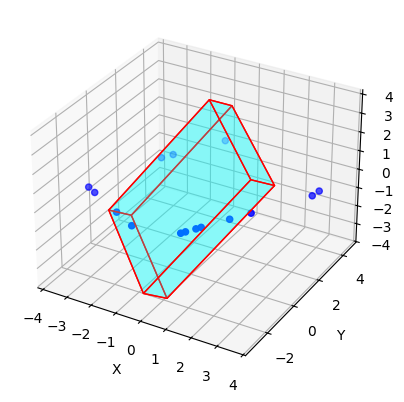

In [36]:
print(points_on_other_planes)
visualize_debug(r, points_on_other_planes)

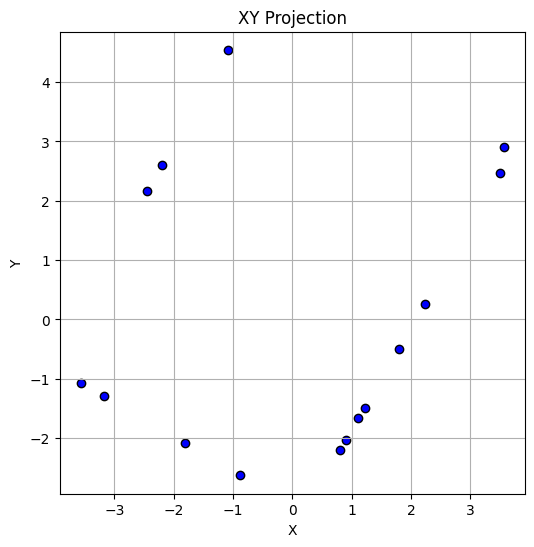

In [37]:
plot_xy_projection(points_on_other_planes)

In [38]:
class Line:
    """
    Represents a line in 2D space using ax + by + c = 0.
    Additionally guarantees that ||(a, b)|| = 1.
    """
    
    @staticmethod
    def from_points(p1, p2):
        x1, y1 = p1
        x2, y2 = p2
        
        a = y1 - y2
        b = x2 - x1
        c = x1 * y2 - x2 * y1
        
        return Line(a, b, c)
    
    def __init__(self, a, b, c):
        norm = math.sqrt(a * a + b * b)
        
        self.a = a / norm
        self.b = b / norm
        self.c = c / norm
    
    def signed_distance_to_point(self, point):
        return self.a * point[0] + self.b * point[1] + self.c
    
    def __eq__(self, other):
        return equals_epsilon(self.a, other.a) and equals_epsilon(self.b, other.b) and equals_epsilon(self.c, other.c)

In [39]:
def rectangle_area(points):
    points = [[p.x, p.y] for p in points]
    
    # radially sort points around the approximate center
    mu_X, mu_Y = sum(p[0] for p in points) / N, sum(p[1] for p in points) / N
    points.sort(key=lambda p: math.atan2(p[1] - mu_Y, p[0] - mu_X))
    
    # collect all unique lines from radially adjacent points
    lines = []
    for i in range(-1, len(points) - 1):
        l = Line.from_points(points[i], points[i + 1])
        if l not in lines:
            lines.append(l)
    
    # try each line as hypothesis for a side of the rectangle
    for line in lines[:8]: # if it is from a rectangle, we should be able to identify it in 8 or less for sure
        new_x_axis = line
        new_y_axis = Line.from_points((0, 0), (new_x_axis.a, new_x_axis.b))
        new_points = [[new_y_axis.signed_distance_to_point(p), new_x_axis.signed_distance_to_point(p)] for p in points]
        
        new_X, new_Y = [p[0] for p in new_points], [p[1] for p in new_points]
        
        new_min_x, new_max_x = min(new_X), max(new_X)
        new_min_y, new_max_y = min(new_Y), max(new_Y)
        
        # if hypothesis works, we have our answer
        if all(equals_epsilon(p[0], new_min_x) or equals_epsilon(p[0], new_max_x) or equals_epsilon(p[1], new_min_y) or equals_epsilon(p[1], new_max_y) for p in new_points):
            return (new_max_x - new_min_x) * (new_max_y - new_min_y)
    
    # otherwise, this ain't it chief
    return None

In [40]:
area = rectangle_area(points_on_other_planes)
area

np.float64(35.00000000000001)

In [41]:
volume = area * max_abs_distance
volume

np.float64(35.00000000000002)

In [42]:
r.volume()


35

In [45]:
Plane.from_points(Point(-22.1234, 500.0, 777.7777777777778),Point(-2.1234, 500.0, 777.7777777777778),Point(-41.1234, 500.0, 777.7777777777778))

ZeroDivisionError: float division by zero

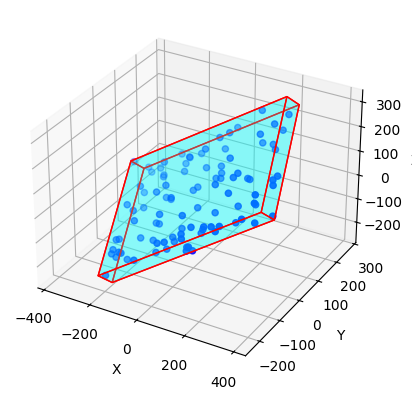

In [65]:
random.seed(133)
r = RectangularPrism(69, 420, 666, (10, 20, 30), (40, 50, 60))
points = [r.sample_surface_point() for _ in range(100)]
visualize_debug(r, points)

In [66]:
for p in points:
    print(*p)

148.49844565779674 168.9973640921263 151.34408832628128
96.28497577517183 67.9562912127664 146.08635143667402
25.848738620581422 148.24561329339485 174.87961391173326
109.56423672074148 -128.04328301714233 -80.84472364060895
-364.40864570194003 115.21087199029691 -26.336395686648146
223.64390474006018 141.67804381176768 163.01890453885994
-152.6209829079714 -173.13670885637256 -133.5399439207749
-203.79258129506806 174.4375934414272 7.493767485757338
17.36000583881639 -157.27363564948644 -50.697048068673695
3.432617835004696 -58.45854800931927 -74.8062784165004
26.820327548937996 80.36310331935448 35.885170153624756
-109.91278190023566 165.83106265570322 40.62681247417002
113.28759827215757 -24.256824042103567 -3.862878243175757
-70.35658961924084 -26.752941420034134 7.348456994731091
117.21449993427481 202.52320186554184 252.65462696180614
-164.80147354827974 -169.8828580903301 -136.2857530519349
-214.1792374883649 -132.46146359168574 -201.41110169816426
-230.87652416934554 115.437544

In [64]:
r.volume()


19300680